In [583]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [1]:
import cv2 as cv

In [17]:
video = cv.VideoCapture('black-gms-20.mp4')

In [18]:
video.isOpened()

True

In [19]:
while True:
    ret, frame = video.read()
    if ret == False:
        break
        
    frame = cv.blur(frame, ksize=(11,11))
    
    cv.imshow ('win', frame)
    
    k = cv.waitKey(30)
    if k == 27:
        break
#
video.release()
cv.destroyAllWindows()

In [5]:
cv.destroyAllWindows()

In [283]:
44100/20

2205.0

In [44]:
import av

In [280]:
container = av.open('black-gms-20.mp4')
container

<av.InputContainer 'black-gms-20.mp4'>

In [281]:
cnt1 = 0
for packet in container.demux():
    cnt2 = 0
    for frame in packet.decode():
#         if frame == None: continue
        print (cnt1, cnt2, dir(frame), type(frame), frame.format)
        cnt2 += 1
        if type(frame) == av.video.frame.VideoFrame:
            print (frame.to_image().size)
            print ('-=-----------------')
        if type(frame) == av.audio.frame.AudioFrame:
            print (frame.rate, frame.sample_rate, frame.time, frame.to_nd_array().shape)
        #break
#     break
    cnt1 += 1

3 0 ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'dts', 'format', 'from_image', 'from_ndarray', 'height', 'index', 'interlaced_frame', 'is_corrupt', 'key_frame', 'pict_type', 'planes', 'pts', 'reformat', 'time', 'time_base', 'to_image', 'to_nd_array', 'to_ndarray', 'to_rgb', 'width'] <class 'av.video.frame.VideoFrame'> <av.VideoFormat yuv420p, 480x272>
(480, 272)
-=-----------------
4 0 ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__',

/home/yndk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: AttributeRenamedWarning: AudioFrame.to_nd_array is deprecated; please use AudioFrame.to_ndarray.
  if sys.path[0] == '':


(480, 272)
-=-----------------
236 0 ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'dts', 'format', 'from_ndarray', 'index', 'is_corrupt', 'layout', 'planes', 'pts', 'rate', 'sample_rate', 'samples', 'time', 'time_base', 'to_nd_array', 'to_ndarray'] <class 'av.audio.frame.AudioFrame'> <av.AudioFormat fltp>
44100 44100 3.4597732426303853 (2, 1024)
237 0 ['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'dts', 'format'

In [548]:
import av
import av.datasets

vframes = []
aframes = []
aframesorg = []

container = av.open('./black-gms-20.mp4')
container.streams.video[0].thread_type = 'AUTO'

In [549]:
for ii in dir(container):
    if not ii.startswith('__'):
        print ('@@ ', ii, getattr(container, ii))

@@  bit_rate 433370
@@  close <built-in method close of av.container.input.InputContainer object at 0x7f5d96ac66c8>
@@  container_options {}
@@  decode <built-in method decode of av.container.input.InputContainer object at 0x7f5d96ac66c8>
@@  demux <built-in method demux of av.container.input.InputContainer object at 0x7f5d96ac66c8>
@@  dumps_format <built-in method dumps_format of av.container.input.InputContainer object at 0x7f5d96ac66c8>
@@  duration 20024000
@@  file None
@@  format <av.ContainerFormat 'mov,mp4,m4a,3gp,3g2,mj2'>
@@  metadata {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf57.83.100'}
@@  metadata_encoding None
@@  metadata_errors strict
@@  name ./black-gms-20.mp4
@@  options {}
@@  seek <built-in method seek of av.container.input.InputContainer object at 0x7f5d96ac66c8>
@@  size 1084726
@@  start_time 0
@@  stream_options []
@@  streams <av.container.streams.StreamContainer object at 0x7f5d96864dc8>
@@  writ

In [550]:
container.streams.audio[0].codec_context

<av.AudioCodecContext audio/aac at 0x7f5d6818d5e8>

In [551]:
audioframe0 = None
count = 0
for frame in container.decode(video=0, audio=0):
    if type(frame) == av.video.frame.VideoFrame:
        arr = np.asarray(frame.to_image())
        cv.imshow ('win', arr)
        cv.waitKey(5)
        vframes.append(arr)
#         print (frame.to_image().size)
#         print ('-=-----------------')
    elif type(frame) == av.audio.frame.AudioFrame:
        count += 1
        if count == 1:
            audioframe0 = frame
        aframes.append(frame.to_ndarray())
        aframesorg.append(frame)
#        aframes.append(frame)
#         print (frame.rate, frame.sample_rate, frame.time, frame.to_nd_array().shape)
    else:
        print ('No AV? ', frame)
#     print (count)
#
cv.destroyAllWindows()

In [464]:
len(vframes), len(aframes), vframes[0].shape, type(aframes[0])

(480, 862, (272, 480, 3), numpy.ndarray)

In [484]:
audioframe0.sample_rate

44100

In [465]:
container.streams.video[0].pix_fmt

'yuv420p'

In [466]:
container.streams.video[0].codec_context

<av.VideoCodecContext video/h264 at 0x7f5cefd6a3b8>

In [467]:
container.streams.audio[0].codec_context

<av.AudioCodecContext audio/aac at 0x7f5d96876048>

In [468]:
container.streams.audio[0].type

'audio'

In [469]:
fps = container.streams.video[0].rate
fps

Fraction(24, 1)

In [620]:
ocont = av.open('output.mp4', mode='w')
astream = ocont.add_stream('aac', rate=container.streams.audio[0].rate)# template=container.streams.audio[0])
#vstr = ocont.add_stream(template=container.streams.video[0])
#vstr = ocont.add_stream('mpeg4', rate=fps)
vstr = ocont.add_stream('h264', rate=fps)
#vstr.width = vframes[0].shape[1]
#vstr.height = vframes[0].shape[0]
#vstr.pix_fmt = 'yuv420p'
print ('video outstream')
for vf in vframes:
    ovf = av.VideoFrame.from_ndarray (vf)
    for packet in vstr.encode(ovf):
        ocont.mux(packet)
# flush
for packet in vstr.encode():
    ocont.mux(packet)
#

print ('audio outstream')
for f in aframes:
    of = av.AudioFrame.from_ndarray(f, format='fltp', layout='stereo')
#    of.rate = audioframe0.rate
#    of.samples = audioframe0.samples
#    of.dts = audioframe0.dts
    for packet in astream.encode(of):
        ocont.mux(packet)
for packet in astream.encode():
    ocont.mux(packet)
#

ocont.close()

Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.


video outstream


Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.


audio outstream


In [641]:
ofilename = 'output-aorg.mp4'
ocont = av.open(ofilename, mode='w')
astream = ocont.add_stream('mp3', rate=container.streams.audio[0].rate)
vstr = ocont.add_stream('h264', rate=fps)

print ('video outstream')
for v in vframes:
    vf = v.copy()
    rdots = np.random.choice([0,1], size=vf.shape)
    #print (rdots.shape, vf.shape)
    #vf = vf * rdots
    vf[10:100,10:200,0] = 255
    
    ovf = av.VideoFrame.from_ndarray (vf)
    for packet in vstr.encode(ovf):
        ocont.mux(packet)
# flush
for packet in vstr.encode():
    ocont.mux(packet)
#

print ('audio outstream')
for of in aframesorg:
    arr = of.to_ndarray() 
    #arr *= 10
#     filtered = np.vstack( [scipy.signal.medfilt(arr[k], 21) for k in range(2)] )
    filtered = arr.copy()
    #print (filtered.shape)
    of2 = av.audio.frame.AudioFrame.from_ndarray (filtered, format='fltp')
    of2.rate = of.rate
    of2.time_base = of.time_base
#    print (of, '\n', of2, '\n----')
    for packet in astream.encode(of2):
        ocont.mux(packet)
for packet in astream.encode():
    ocont.mux(packet)
#

ocont.close()
print ('done: ', ofilename)

Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.


video outstream
audio outstream


Using AVStream.codec to pass codec parameters to muxers is deprecated, use AVStream.codecpar instead.


done:  output-aorg.mp4


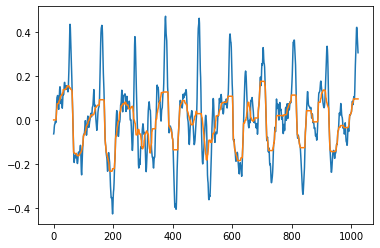

In [626]:
x = aframes[100]
xf = np.vstack( [scipy.signal.medfilt(x[k], 31) for k in range(2)] )
plt.plot(x[0])
#plt.plot(x[1])
plt.plot(xf[0])
#plt.plot(xf[1])

In [628]:
xf.shape, x.shape

((2, 1024), (2, 1024))

In [530]:
aa = of.to_ndarray()
print (aa.shape)
aa *= 0.
of2 = av.audio.frame.AudioFrame.from_ndarray (aa, format='fltp')
of2.pts = of.pts
of2.to_ndarray().sum()

(2, 1024)


0.0

In [531]:
of2.pts, of.pts

(881664, 881664)

In [353]:
container.streams.audio[0].frames

863

In [354]:
container.streams.video[0].frames

480

In [355]:
for ii in dir(video):
    if not ii.startswith('__'):
        print ('@@ ', ii, getattr(video, ii))

@@  average_rate 24
@@  codec_context <av.VideoCodecContext video/h264 at 0x7f5d9984fe08>
@@  container <av.InputContainer './black-gms-20.mp4'>
@@  decode <built-in method decode of av.video.stream.VideoStream object at 0x7f5d96c2e588>
@@  duration 245760
@@  encode <built-in method encode of av.video.stream.VideoStream object at 0x7f5d96c2e588>
@@  frames 480
@@  id 1
@@  index 0
@@  language und
@@  metadata {'language': 'und', 'handler_name': 'VideoHandler'}
@@  profile High
@@  seek <built-in method seek of av.video.stream.VideoStream object at 0x7f5d96c2e588>
@@  start_time 0
@@  time_base 1/12288
@@  type video


/home/yndk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MethodDeprecationWarning: VideoStream.seek is deprecated.
  This is separate from the ipykernel package so we can avoid doing imports until


In [356]:
video.frames / video.average_rate * 1. # total play time

20.0

In [357]:
for ii in dir(audio):
    if not ii.startswith('__'):
        print ('@@ ', ii, getattr(audio, ii))

@@  average_rate None
@@  codec_context <av.AudioCodecContext audio/aac at 0x7f5d96de5e08>
@@  container <av.InputContainer './black-gms-20.mp4'>
@@  decode <built-in method decode of av.audio.stream.AudioStream object at 0x7f5d96c2eb88>
@@  duration 882000
@@  encode <built-in method encode of av.audio.stream.AudioStream object at 0x7f5d96c2eb88>
@@  frames 863
@@  id 2
@@  index 1
@@  language und
@@  metadata {'language': 'und', 'handler_name': 'SoundHandler'}
@@  profile LC
@@  seek <built-in method seek of av.audio.stream.AudioStream object at 0x7f5d96c2eb88>
@@  start_time 0
@@  time_base 1/44100
@@  type audio


/home/yndk/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MethodDeprecationWarning: AudioStream.seek is deprecated.
  This is separate from the ipykernel package so we can avoid doing imports until


In [307]:
audio.duration, audio.frames*1024

(882000, 883712)

In [308]:
audio.duration / 44100

20.0

In [321]:
count = 0
for fr in container.decode(audio=0):
    count += 1
    arr = fr.to_ndarray()
    aframes.append(arr)
    print (count, arr.shape, arr)
    #if count == 5: break

1 (2, 1024) [[ 0. -0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]]
2 (2, 1024) [[ 0. -0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]]
3 (2, 1024) [[ 0. -0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]]
4 (2, 1024) [[ 0. -0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]]
5 (2, 1024) [[ 0. -0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]]
6 (2, 1024) [[ 0. -0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]]
7 (2, 1024) [[ 0. -0.  0. ...  0.  0.  0.]
 [ 0. -0.  0. ...  0.  0.  0.]]
8 (2, 1024) [[-6.6456354e-11 -3.4312533e-10 -2.2520465e-10 ...  4.1190384e-07
   7.9799236e-07  2.2715341e-07]
 [-1.6226004e-10 -8.5940241e-11  4.4980514e-10 ... -8.2270265e-07
   1.9986766e-07  5.5461845e-07]]
9 (2, 1024) [[-9.7773864e-08  5.0026898e-07  6.1978079e-07 ...  1.0838989e-03
   1.1916049e-03  1.1981506e-03]
 [-3.4612265e-07  4.2855248e-07  9.8780288e-07 ...  1.0886742e-03
   1.1836686e-03  1.1974217e-03]]
10 (2, 1024) [[ 0.00113811  0.00111238  0.00115005 ..

In [317]:
len(aframes)

0

In [318]:
aframes[0].shape

IndexError: list index out of range

In [319]:
plt.plot(aframes[100][0])

IndexError: list index out of range

In [226]:
af = np.asarray (aframes)

In [227]:
af.shape

(862, 2, 1024)

In [228]:
af.max()

0.87209576

In [229]:
af.min()

-0.86855376